Author: Ahmed Youri Sobhi [ahmedyousrisobhi@gmail.com]

Creation_date: 7th Sep 2023

Notebook number : 3

Objective: Dataset EDA after cleaning.

Abstract:
- Now the dataset is cleaned, let's dig more into data exploration and analysis.

# Importing Required Libararies and Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os

import pandas as pd
import numpy as np

# Used for visulization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

# For iteration visulization purpose
from tqdm import tqdm

# Data Loading

In [2]:
df = (
    pd.read_csv('../data/intermid/marketing_campaign.csv')
    .assign(
        Dt_Customer= lambda x:pd.to_datetime(x.Dt_Customer, format='%Y-%m-%d')
    )
)

# Display first 5 rows
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2143 non-null   int64         
 1   Year_Birth           2143 non-null   int64         
 2   Education            2143 non-null   object        
 3   Marital_Status       2143 non-null   object        
 4   Income               2143 non-null   float64       
 5   Kidhome              2143 non-null   int64         
 6   Teenhome             2143 non-null   int64         
 7   Dt_Customer          2143 non-null   datetime64[ns]
 8   Recency              2143 non-null   int64         
 9   MntWines             2143 non-null   int64         
 10  MntFruits            2143 non-null   int64         
 11  MntMeatProducts      2143 non-null   int64         
 12  MntFishProducts      2143 non-null   int64         
 13  MntSweetProducts     2143 non-nul

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2143.0,5577.097993,3254.677178,0.0,2800.0,5453.0,8417.0,11191.0
Year_Birth,2143.0,1968.919739,11.927657,1893.0,1960.0,1970.0,1977.0,1996.0
Income,2143.0,51172.612692,20276.965107,4428.0,34951.0,50616.0,67269.5,113734.0
Kidhome,2143.0,0.451703,0.539197,0.0,0.0,0.0,1.0,2.0
Teenhome,2143.0,0.511433,0.543818,0.0,0.0,0.0,1.0,2.0
Recency,2143.0,49.010733,28.957975,0.0,24.0,49.0,74.0,99.0
MntWines,2143.0,286.915539,310.752015,0.0,23.0,170.0,483.0,1296.0
MntFruits,2143.0,26.161456,39.687941,0.0,2.0,8.0,32.0,199.0
MntMeatProducts,2143.0,159.041064,211.673063,0.0,15.0,64.0,217.0,984.0
MntFishProducts,2143.0,37.559029,55.148125,0.0,3.0,12.0,50.0,259.0


# Multi-Varient Analysis

## 1- Customer Purchase Behavior Analysis
Description: This analysis aims to analysis the customer spending behavior on various product categories (e.g., wine, meat, fruit) and how it relates to their household composition (e.g. Income, Kids)

### What is the most bought product?

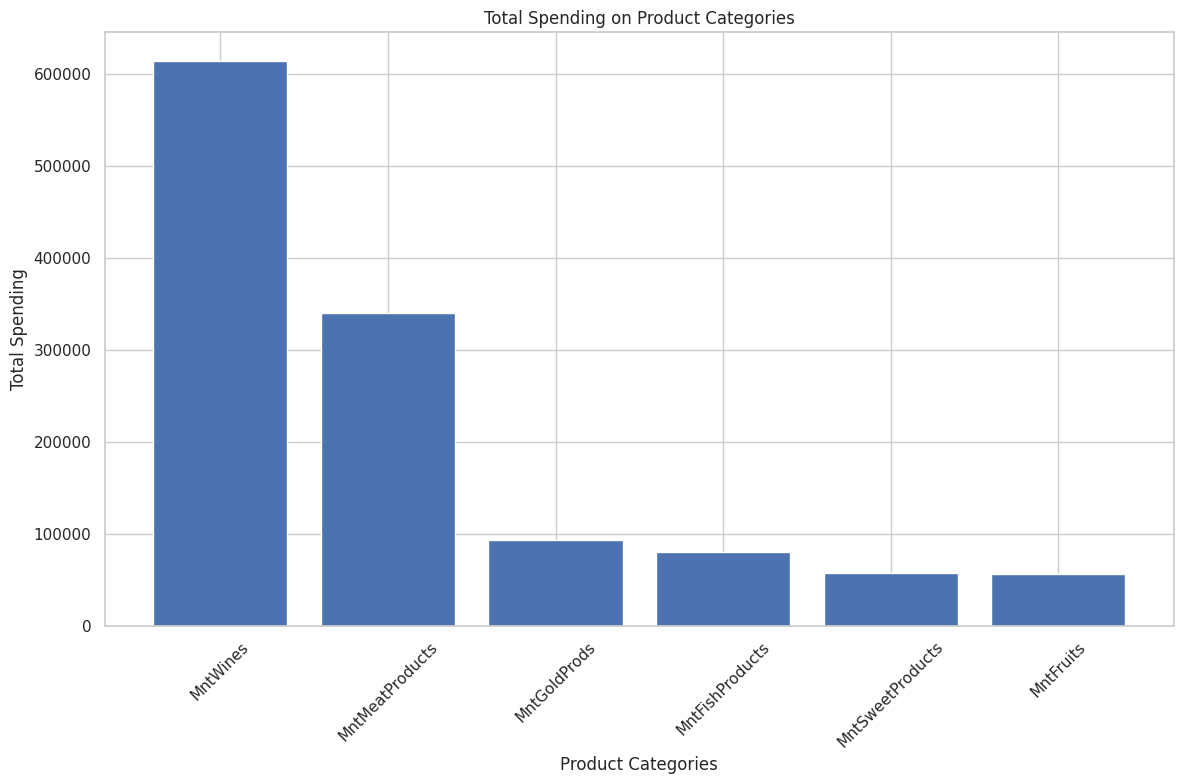

In [17]:
# Bar plot of spending on wine
df_product_speding = (
    df[df.columns[9:15]].sum()
    .reset_index()
    .rename(columns={'index':'products', 0:'spending'})
    .sort_values(by='spending', ascending=False)
)

plt.figure(figsize=(12, 8))
plt.bar(df_product_speding.products, df_product_speding.spending)
plt.xlabel('Product Categories')
plt.ylabel('Total Spending')
plt.title('Total Spending on Product Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../report/plots/Total Spending on Product Categories.jpg')
plt.show()

Insights: The most common purchased products were [Wines, Meats]

### Let's Visualize Purchase Behaviour

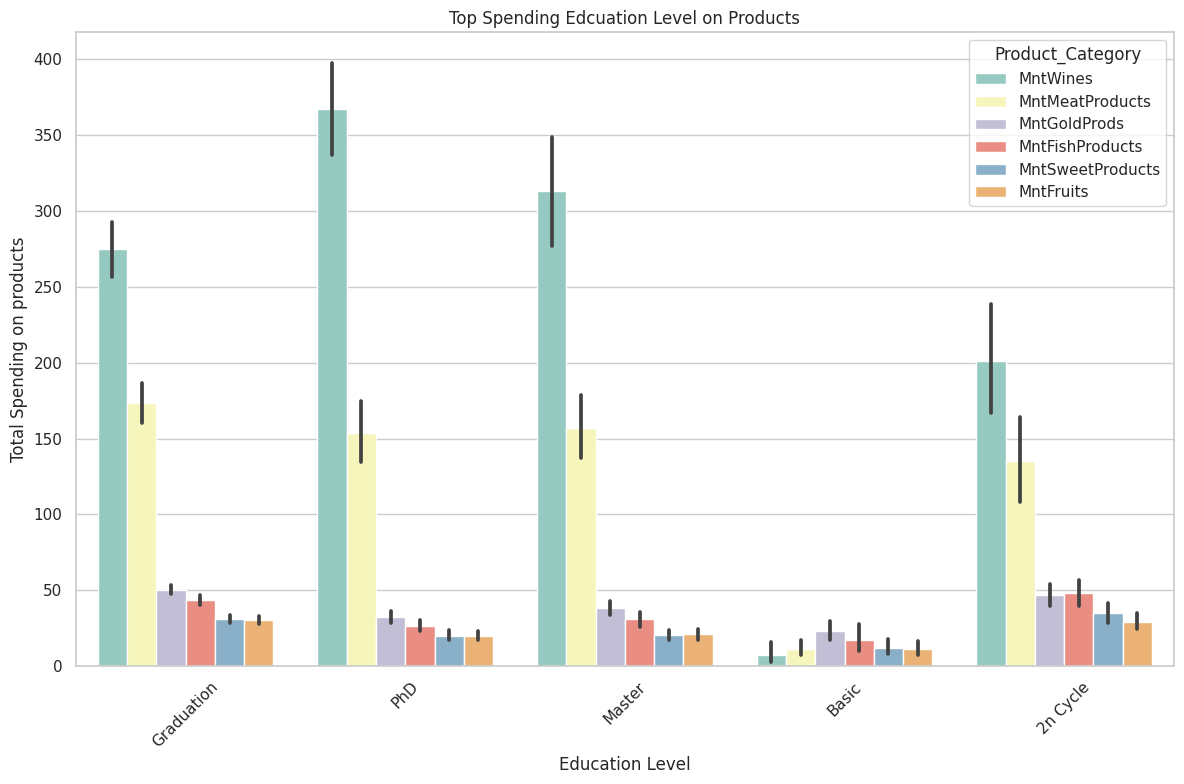

In [14]:
# Bar plot of spending on wine
features = df.columns[9:15].tolist()

df_melted = pd.melt(df, id_vars='Education', value_vars=df.columns[9:15], var_name='Product_Category')

plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x='Education', y='value', 
            hue='Product_Category',palette='Set3', 
            hue_order=df_melted.groupby('Product_Category')['value'].sum().sort_values(ascending=False).index)
plt.xlabel('Education Level')
plt.ylabel(f'Total Spending on products')
plt.title(f'Top Spending Edcuation Level on Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../report/plots/Top Spending Edcuation Level on Products.jpg')
plt.show()

Insights:
- The most purchased products are Wines and Meats
- Customers with PhD level tends to buy more wines that the others.
- The higher the level of education the more tends to buy wines and meats.
- Level [Graduation & 2n Cycle] tends to buy more fish, sweet, and fruits products than other levels.
- Error Bars [Vertical black lines] are graphical representation of the variability of data an used on graphs to indicate the error or uncertainty in a reported measurements. So they are set to 95% of error.

### Explore Demographic factors regarding purchase behaviour by Customers

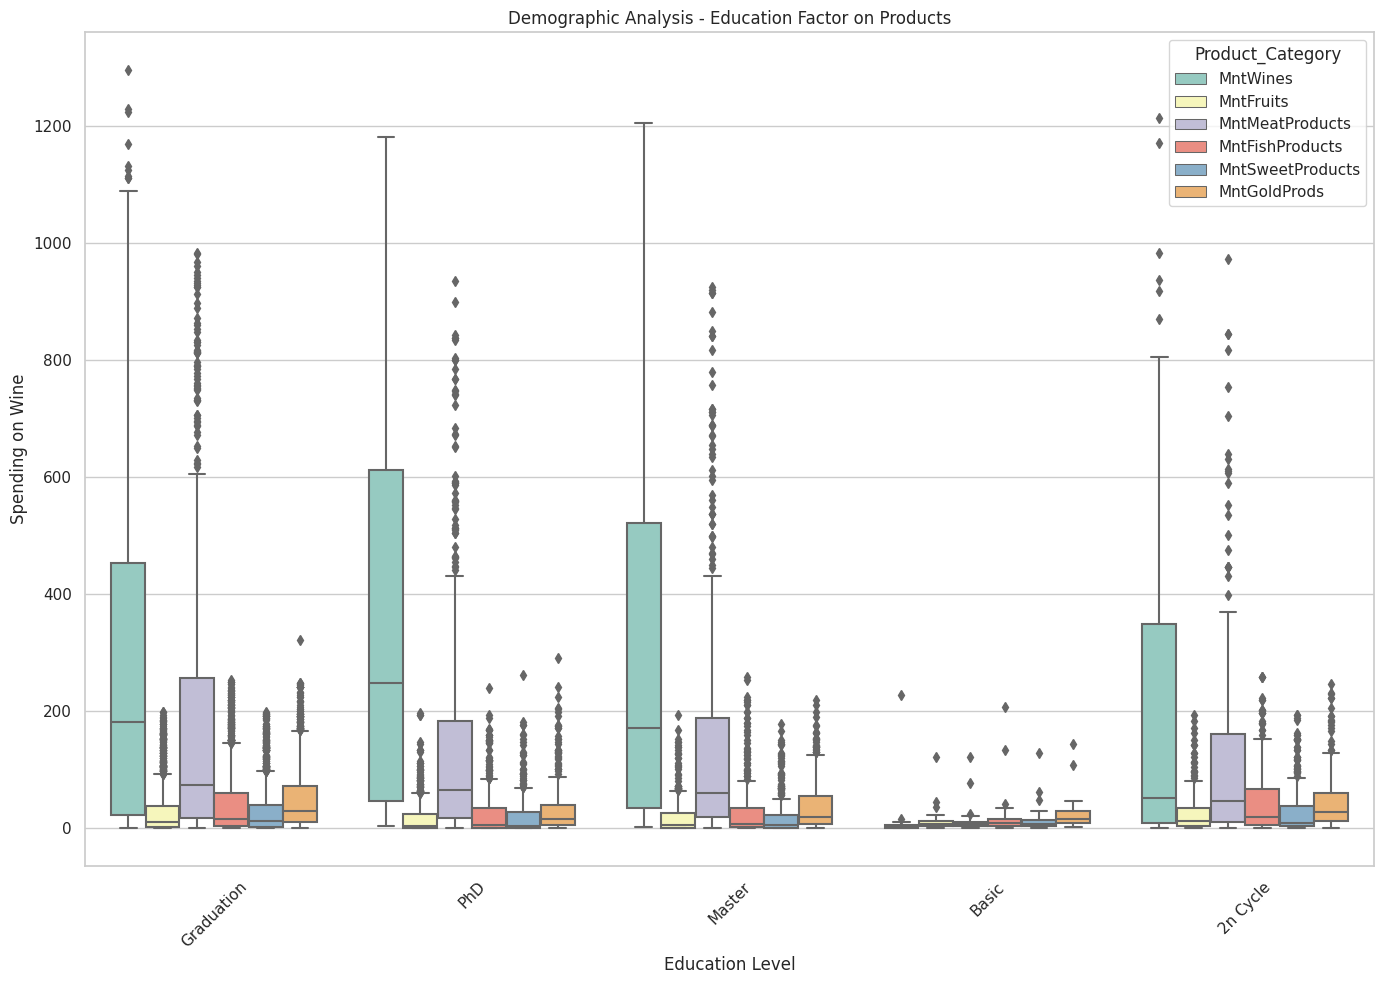

In [68]:
# Melt the DataFrame to combine columns 9 to 15 into a single column
melted_df = pd.melt(df, id_vars='Education', value_vars=df.columns[9:15], var_name='Product_Category')

# Example: Box plot of spending on wine by education level
plt.figure(figsize=(14, 10))
sns.boxplot(x='Education', y='value', hue='Product_Category', data=melted_df, palette='Set3')
plt.xlabel('Education Level')
plt.ylabel('Spending on Wine')
plt.title('Demographic Analysis - Education Factor on Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../report/plots/Demographic Analysis - Education Factor on Products.jpg')
plt.show()

Insights:
- The demographic insights on the education level indicate that there are customers who tends to buy more in every products based on the outliers dots shown in the above figure, which could be cluster on their own.
- In each product, the central of tendency (median) are low which represent huge number of customers buying each type of products with a huge quantaties.